## Import

In [1]:
import pandas as pd
import random
import os
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
from operator import itemgetter 
from matplotlib import pyplot
from collections import Counter

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


OUTPUT_PATH = './contour'
Fig_path = './fig/'
Fasta_path = './fasta'

if not os.path.exists(OUTPUT_PATH): os.mkdir(OUTPUT_PATH)
if not os.path.exists(Fig_path): os.mkdir(Fig_path)
if not os.path.exists(Fasta_path): os.mkdir(Fasta_path)
seq = SeqIO.parse('fasta/US_2020_0163988_A1.fasta', 'fasta')

seqs=[]
for s in seq:
    seqs.append(str(s.seq))
path='ido-patent/'

target_cell='Merge' #EFO-21,SK-OV-3, Merge
extract_mode = False #True: use ASO seqeunces (length > 16), False: use all ASO seqeunces

## Load patent experiments

In [2]:
df_EFO = pd.read_csv(path+'EFO21_experiments.csv')
df_SKOV = pd.read_csv(path+'SK0V3_experiments.csv')

 
if target_cell=='EFO-21':
    df_target  = df_EFO
    
elif target_cell=='SK-OV-3':
    df_target  = df_SKOV  

elif target_cell=='Merge':
    df_target  = pd.concat([df_EFO,df_SKOV])  
    
print("# of seqeuences in {}: {}".format(target_cell,len(df_target)))

# of seqeuences in Merge: 155


In [3]:
seq_check = df_target['Sequence'].values
len_seq=[]
for ii in range(len(seq_check)):
    len_seq.append(len(seq_check[ii]))
    
df_target['len_seq'] = len_seq
len_seqs=np.array(df_target['len_seq'].values)

if extract_mode==True:
    df_target = df_target[df_target['len_seq'] >16]

df_target = df_target.drop(columns=['len_seq'])

## Data Loader (Features of ido1 in patent)

In [4]:
gibbs_target = np.load(path+'ido1_target_gibbs_patent.npy')
gibbs_off_target = np.load(path+'ido1_off_target_gibbs_patent.npy')
folds_target = np.load(path+'ido1_target_gibbs_folds_patent.npy')

gibbs_off_target.sort(axis=1)

In [5]:
topk=10 #25, 50, 100
gibbs_off_target_topk =np.mean(gibbs_off_target[:,:topk],axis=1)

## IDO1 mRNA Sequence

In [6]:
df_ref =  pd.read_csv('mrna_dataset/ido1_information.csv')

In [7]:
ido=str(list(df_ref[df_ref['Genbank_accession']=='NM_002164']['sequence'].values))[2:-2] ## ido gene sequence
ido_len = len(ido)

In [8]:
ASO_seq=seqs 
ido=str(list(df_ref[df_ref['Genbank_accession']=='NM_002164']['sequence'].values))[2:-2]

RNA_fold = '.((.(((..(((..(((((((((..........(((((.((..((((((...((((..(((.(((((((..........)))))))...(((((.((((..((((((.........((((((((((.....))))))..........(((((((........))))))).))))......))))))..)))).)))))((((..((((((((............)))))).)).....))))...(((.....))).....(((((((((((...(((.(((((....)).))).)))..)))))))))))....)))..))))...))))))..))..)))))..........)))))))))...((((.(((((((......)))).(((((((...((((((((..(((((((...))))..))))))))))).................(((((((((...(((((((((.........)))))))))...(((.(((.((((((((...((((....))))(((((((((((((((((((...((((......))))......((((.....))))........((.((((((((((((...(((((...((((((((((((.((((((...)))))).))))((((((((......))))))))..(((((...(((...)))...)))))((((((((.((((((((((((.((((.(((((((((((((((((((...((...)).)))))...))))))....))))))))..((((.((....)))))).....(((((.((((((((..(((........)))..)))).((((((((((....((((....(((.(((((......((((((((........((.((((..(((....)))..)))).)).......)))))))).(((((((...)))))))(((....)))........((((.....)))).((.((((((.....(((..(((((((.(((((((((((((..(((..((((((..((((((((....))...))))))..)))..)))...)))...))))).........)))))))).)))))))))))))))).)).........(((((...)))))...))))).)))..))))....))))))))))............)))).)))))....)))).)).))))))))))..))))))..))..(((((...))))).....................))))))))...))))).))))))..)).)))).))(((((((......................))))))))))))))))))......(((((..(((.((....(((((((...(((((....)))))...))...))))).....((((....))))..)).))))))))...((((((((((((((.........(((...))).........)))).))))))))))........((((((.((((((.....)))).))...)))))).....))))))))((((((((....((((..((((((((...........))))))))......))))...)))))))).....................(((...(((....))))))..)))))))))))..)))))))).))))))))))))))..)))))))..)))))(((((((((.((((((((.((((....)).))))))))))(((.((((.......)).)).))))))))))))...................((((((.((((((...........))).))).)))))).'
RNA_fold2= '.......((((...(((((((((..........(((((.((..((((((...((((..(((.(((((((..........))))))).................................(((((((.....)))))))..........((((.(((.(((.........(((.((.(((...))))).))).....................................))).))).)))).....(((.....))).....(((((((((((...(((.((((......).))).)))..)))))))))))....)))..))))...))))))..))..)))))..........)))))))))..)))).....((((......))))...((((((((....(((((((((.........................................(((((((((...(((((((((.........)))))))))...(((.(((.((((((((...((((....))))...........(((((((...((((((..(((..(((....((((...((((.(.(((((............)))))..)...)))).)))))))..)))..))))))..............((((((((......))))))))..)))))))....................((((((.(((((((((.((.((((..(((((..(((((((((((...((...)).)))))...))))))......)))))...(((..(......).)))............................(((((((.(........))))))))..........................((((((((........((.((((..(((....)))..)))).)).......)))))))).(((((((...))))))).(((((....(((.......(((.((.......(.((((((.....(((..(((((((.(((((((((((((..(((..((((((..((((((...........))))))..)))..)))...)))...))))).........)))))))).)))))))))))))))).)..........(((((...)))))...............))..))).......)))...)))))..................)))).))..)))))))))..))))))......(((((...))))).....................................................................................((((.((((.....)))).))))..................((((.(....(((((....)))))....)....))))..................................(((((((((((((..........(.....)..........)))).)))))))))....................................(((((......)))))....((((((((....((((..((((((((...........))))))))......))))...))))))))..........................................)))))))))))..)))))))).))))..............))))))))))))))))).....((((((((.((((....)).))))))))))....................................................((((((.((((((...........))).))).)))))).'
RNA_fold3= '....(((..(((..(((((((((..........(((((.((..((((((...((((..(((......................(((((.(((((.((((..((((((....(((..((((........))))...............(((((((........)))))))....)))....))))))..)))).)))))........((((((..(.....)...)))))).....))))).....(((.....))).....((((..(((((...((..(((((....)).)))..))..)))))..))))....)))..))))...))))))..))..)))))..........))))))))).(((((.....((((......))))...(((((((.....(((...(((..(((((((((.(((...((((...........(((((....((((((.....(((((((((.........))))))))).(((((..(((((((.......((((....)))))))))))...(((((((((.(((((((.((((..((((....(((...((((..(((.......))).(((....))).....)))).)))))))...))))))))))).............((((((((......)))))))).)))))))))...)))))...((..(((((.......(((..(((.(..(((((.((((..((((((((((((...((....)))))))...)))))))....)))).)))))..).)))..))).......)).)))..)))))))).(..((((.......((.((((((..((((((((..(((.((((((....))))))))).((((((((........((.((((..(((....)))..)))).)).......))))))))..(((((((.....(((((((.((((((((......((((.....)))).((.((((((.....(((..(((((((.(((((((((((((..(((..((((((..((((((..((.....))))))))..)))..)))...)))...))))).........)))))))).)))))))))))))))).))...)).))))))....(((((((((..(((.(((............)))..............((((......(((......)))......))))..))).)))))))))..(((((...)))))......)))))))......((((.((((....))))))))..)))))))...............))))).)))............((((.((((.....)))).)))).....)))))))).......))))..)........)))))............(((((((....))))))).))))...(((((((...((((((((((((((.........((.....)).........)))).)))))))))).(((.(((((((((.((((((.....)))).))...))))))....))).)))..((((((((....((((..((((((((...........))))))))......))))...)))))))).........))))))).....)))))))))))).)))...))).(((((....)))))..)))))))...))))).........)))..)))..(((((((((..(((((((.((((....)).))))))))).(((.((((.......)).)).))))))))))))...................(((((..((((((...........))).)))..))))).'
RNA_fold4= '...(((.((((...(((((((((..........(((((.((..((((((...((((..(((.(((((((..........)))))))...(((((.((((..((((((....(((..((.(((((((.....)))))))....))..((((((((........))))))))...)))....))))))..)))).)))))((((.((.((((((..((.....)).)))))).)).....))))...(((.....))).....(((((((((((...(((.(((((....)).))).)))..)))))))))))....)))..))))...))))))..))..)))))..........)))))))))..))))..)))((((......))))..(((((((..(((((((.(((((....((.(((..(((.....(((..........)))......)))...))).)).((((((((.((.(((((((((.(((.(((((..(((((((.......((((....)))))))))))...(((((((((..((((((.((((.((....((((((...((((..((((((....((...)).)))))).....)))).)))))).)).))))))))))((((.....)))).((((((((......)))))))).)))))))))...)))))..))).))))...))))).....)).)))))))).)))))...((((((((((((...((...)).))))))...))))))((((((...(((((((((.((((....))))....(((((((.(((.((...(((((.(((((((...........)))))))....)))))...)).))).)))))))((((((((........((.((((..(((....)))..)))).)).......)))))))).(((((((...)))))))....((((((((......((((.....)))).((.((((((.....(((..(((((((.((((((((....(((((.....(.(((..((..((((((((....))))..))))...))...))).).....)).))).....)))))))).)))))))))))))))).))...)).)))))).)))))))))..)))))).))))))).....))))))).((((..((((..((((((((((..((((.....))))...((....)).))))...))))))(((..(((......)))..))).))))..))))..(((((....))))).(((.((((((((.(((.((...((.(((((((.......((((....((((.((((.....)))).))))(((((.((.((((.........(((...(((((....)))))...)))..))))..)).))))).))))........))))))).)).((((((((((((((.........(((...))).........)))).))))))))))(((((..(((((((.((((..((((.(((((((..((((((....)))))).......)))))))..((((..((((((((...........))))))))......))))..((((((.(((.((((............))))..))).)))).)).))))..))))...)))))))...))))))).)))))))))))....)))....((((((...((((..((((((((.((((....)).)))))))))))))).)))))).....((((((....))).)))...................((((((.((((((...........))).))).)))))).'

# v1: rnafold, v2: e2efold, v3: mfold best, v4: mfold_v2 second

In [9]:
e2e_df = pd.read_csv('mrna_dataset/E2EFOLD.csv', header=None)
predictions = e2e_df[4].values
RNA_fold2=[]
for i in predictions:
    if i==0:
        RNA_fold2.append('.')
    else:
        RNA_fold2.append('(')
RNA_fold2 = ''.join(RNA_fold2) # E2E FOLD

## Getting secondary structure score

In [10]:
from random import randint
seqs_list=[]
for ii in range(len(ASO_seq)):
    vec = ASO_seq[ii][::-1]
    target_seqs=[]
    for index in range(len(vec)):
        if vec[index] =='G':
            target_seqs.append('c')
        elif vec[index] =='C':
            target_seqs.append('g')
        elif vec[index] =='T':
            target_seqs.append('a')
        elif vec[index] =='A':
            target_seqs.append('t')
    target_seqs="".join(target_seqs)
    seqs_list.append(target_seqs)
    
    
fold_v1,fold_v2,fold_v3,fold_v4 =[],[],[],[]

for ii in range(len(seqs_list)):
    idx=ido.find(seqs_list[ii])

    fold_v1.append(RNA_fold[idx:idx+len(seqs_list[ii])])
    fold_v2.append(RNA_fold2[idx:idx+len(seqs_list[ii])])
    fold_v3.append(RNA_fold3[idx:idx+len(seqs_list[ii])])
    fold_v4.append(RNA_fold4[idx:idx+len(seqs_list[ii])])
        

rnafold,e2efold,mfold_best,mfold_second_best =[],[],[],[] 

for ii in range(len(fold_v1)):

    if len(fold_v1[ii])==0:
        rnafold.append(0.5)
        e2efold.append(0.5)
        mfold_best.append(0.5)
        mfold_second_best.append(0.5)
        
    else:
        
        rnafold.append(fold_v1[ii].count('.')/len(fold_v1[ii]))
        e2efold.append(fold_v2[ii].count('.')/len(fold_v2[ii]))
        mfold_best.append(fold_v3[ii].count('.')/len(fold_v3[ii]))
        mfold_second_best.append(fold_v4[ii].count('.')/len(fold_v4[ii]))


rnafold = np.array(rnafold)
e2efold = np.array(e2efold)
mfold_best = np.array(mfold_best)
mfold_second_best = np.array(mfold_second_best)


In [11]:
def objective_func_given_x1(Inputs, alpha,  beta): 
    gibbs = Inputs[0]
    others_gibbs = Inputs[1]
    folds = Inputs[2]

    obj_ftn =  gibbs - alpha * others_gibbs - beta * (1-(0.7-folds)**2) 
    return obj_ftn

In [12]:
def objective_func_given_x2(Inputs, alpha,  beta): 
    gibbs = Inputs[0]
    others_gibbs = Inputs[1]
    folds = Inputs[2]

    obj_ftn =  alpha * gibbs -  others_gibbs - beta * (1-(0.7-folds)**2) 
    return obj_ftn

In [13]:
def objective_func_given_x3(Inputs, alpha,  beta): 
    gibbs = Inputs[0]
    others_gibbs = Inputs[1]
    folds = Inputs[2]

    obj_ftn =  alpha * gibbs -  beta * others_gibbs - (1-(0.7-folds)**2) 
    return obj_ftn

## Grid search - Correlation

In [14]:
from tqdm import tqdm
def cal_cor(cell,Get_inputs,xdata,ydata,GC=False,gc_th=0.5,mode='x1'):
    cors=[]  
    target = cell.copy()
 
    for jj in ydata:
        for ii in xdata:
            if mode=='x1':
                 obj_fun = objective_func_given_x1(Get_inputs,ii,jj) #on-target
            elif mode=='x2':
                obj_fun = objective_func_given_x2(Get_inputs,ii,jj) #off-target
            elif mode=='x3':
                obj_fun = objective_func_given_x3(Get_inputs,ii,jj) #secondary
            gibbs_dict={}
            for x,y in zip(seqs, np.array(obj_fun)):
                gc_contents=(x.count('G')+x.count('C'))/len(x)
                GC_penalty=300*(gc_th-gc_contents)**2
                if GC==True:
                    y+=GC_penalty
                gibbs_dict[x]=y

            atgc=target['Sequence'].values

            gibbs_score=[]
            for kk in range(len(target)):
                gibbs_score.append(gibbs_dict[atgc[kk]])         

                rates = target['Inhibition rate']
                scores = np.array(gibbs_score)

            gibbs_score = np.array(gibbs_score)
            target['gibbs_score'] =  gibbs_score


            cor1 =target.corr().values[0,1]
            cors.append(cor1)
            
    cors = np.reshape(cors,[len(ydata),len(xdata)])

    return cors

In [15]:
Inputs_rna=np.vstack([gibbs_target,gibbs_off_target_topk,rnafold])
Inputs_e2e=np.vstack([gibbs_target,gibbs_off_target_topk,e2efold])
Inputs_mfold=np.vstack([gibbs_target,gibbs_off_target_topk,mfold_best])

In [16]:
xdata = np.linspace(0,2,20)
ydata = np.linspace(0,80,40)

In [17]:
cors_mfold = cal_cor(df_target,Inputs_mfold, xdata, ydata, GC=False, mode='x1')
cors_e2efold = cal_cor(df_target,Inputs_e2e, xdata, ydata, GC=False, mode='x1')
cors_rnafold = cal_cor(df_target,Inputs_rna, xdata, ydata, GC=False, mode='x1')
# cors_rnafold.max()

In [18]:
np.save(OUTPUT_PATH+'/x1_all.npy',cors_mfold)

## Plot Supple figure

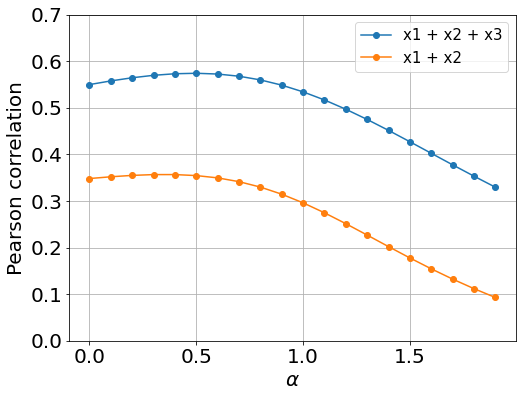

In [19]:
fig = plt.figure(figsize=(8, 6))
alpha = np.arange(0, 2, 0.1)
beta = np.arange(0, 80, 2)

ind = np.unravel_index(np.argmax(cors_mfold, axis=None), cors_mfold.shape)

plt.plot(alpha,cors_mfold[ind[0]],'-o',label='x1 + x2 + x3')
plt.plot(alpha,cors_mfold[0,:],'-o',label='x1 + x2')


plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel('Pearson correlation',fontsize=20)
plt.ylim([0, 0.7])
plt.legend(prop={'size': 15})
plt.grid(True)
plt.savefig(Fig_path+'/{}_1_merge_0917.png'.format(target_cell),dpi=500)

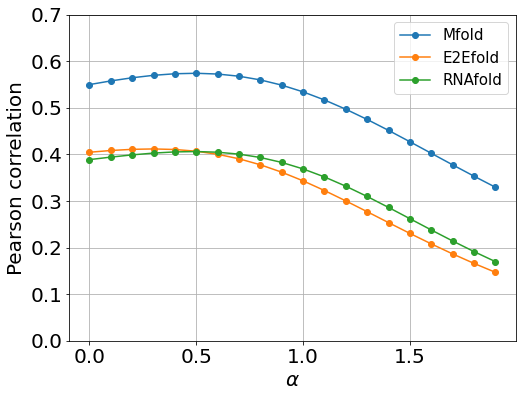

In [20]:
fig = plt.figure(figsize=(8, 6))
alpha = np.arange(0, 2, 0.1)


ind1=np.unravel_index(np.argmax(cors_rnafold, axis=None), cors_rnafold.shape)
ind2=np.unravel_index(np.argmax(cors_e2efold, axis=None), cors_e2efold.shape)
ind3=np.unravel_index(np.argmax(cors_mfold, axis=None), cors_mfold.shape)

plt.plot(alpha,cors_mfold[ind3[0]],'-o',label='Mfold')
plt.plot(alpha,cors_e2efold[ind2[0]],'-o',label='E2Efold')
plt.plot(alpha,cors_rnafold[ind1[0]],'-o',label='RNAfold')


plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel('Pearson correlation',fontsize=20)
plt.ylim([0, 0.7])
# plt.legend()
plt.legend(prop={'size': 15})
plt.grid(True)
plt.savefig(Fig_path+'/{}_2_merge_0917.png'.format(target_cell),dpi=500)

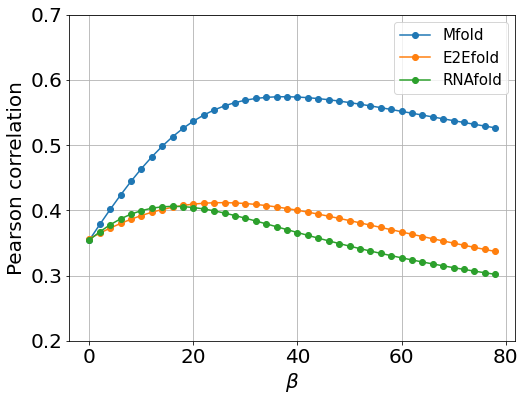

In [21]:
fig = plt.figure(figsize=(8, 6))
alpha = np.arange(0, 2, 0.1)
beta = np.arange(0, 80, 2)

ind1 = np.unravel_index(np.argmax(cors_mfold, axis=None), cors_mfold.shape)
ind3 = np.unravel_index(np.argmax(cors_rnafold, axis=None), cors_mfold.shape)
ind2 = np.unravel_index(np.argmax(cors_e2efold, axis=None), cors_mfold.shape)

plt.plot(beta,cors_mfold[:,ind1[1]],'-o',label='Mfold')
plt.plot(beta,cors_e2efold[:,ind2[1]],'-o',label='E2Efold')
plt.plot(beta,cors_rnafold[:,ind3[1]],'-o',label='RNAfold')


plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Pearson correlation',fontsize=20)
plt.ylim([0.2, 0.7])
plt.legend(prop={'size': 15})
plt.grid(True)
plt.savefig(Fig_path+'/{}_3_merge_0917.png'.format(target_cell),dpi=500)